<h2>Interactive Visualization of Data across Strata</h2>

<h3>Interactive Scatter Plots</h3>

<h4>EX01: Adding Zoom-In and Zoom-Out to a Static Scatter Plot</h4>

In [4]:
import pandas as pd
hpi_df = pd.read_csv('./hpi_data_countries.tsv', sep = '\t'); hpi_df.head()

,HPI Rank,Country,Region,Life Expectancy (years),Wellbeing (0-10),Inequality of outcomes,Ecological Footprint (gha/capita),Happy Planet Index
0,1,Costa Rica,Americas,79.1,7.3,15%,2.8,44.7
1,2,Mexico,Americas,76.4,7.3,19%,2.9,40.7
2,3,Colombia,Americas,73.7,6.4,24%,1.9,40.7
3,4,Vanuatu,Asia Pacific,71.3,6.5,22%,1.9,40.6
4,5,Vietnam,Asia Pacific,75.5,5.5,19%,1.7,40.3


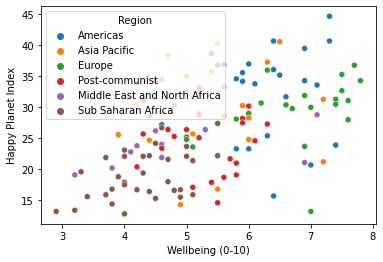

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
f = plt.figure()
ax = f.add_subplot(111)
ax = sns.scatterplot(x = 'Wellbeing (0-10)', 
                     y = 'Happy Planet Index', 
                     hue = 'Region',
                     data = hpi_df)
plt.show()

In [6]:
!pip install altair

In [7]:
import altair as alt
# alt.renderers.enable('notebook')
alt.Chart(hpi_df).mark_circle().encode(
    x = 'Wellbeing (0-10):Q',
    y = 'Happy Planet Index:Q',
    color = 'Region:N').interactive()

alt.Chart(...)

<h4>EX02: Adding Hover and Tooltip Functionality to a Scatter Plot
</h4>

In [9]:
import altair as alt
hpi_df = pd.read_csv('./hpi_data_countries.tsv', sep = '\t')
alt.Chart(hpi_df).mark_circle().encode( 
    x = 'Wellbeing (0-10):Q',
    y = 'Happy Planet Index:Q',
    color = 'Region:N',
    tooltip = ['Country', 
               'Region', 
               'Wellbeing (0-10)',
               'Happy Planet Index',
               'Life Expectancy (years)'])

alt.Chart(...)

In [12]:
# Add the interactive
alt.Chart(hpi_df).mark_circle().encode(
    x = 'Wellbeing (0-10):Q',
    y = 'Happy Planet Index:Q',
    color = 'Region:N',
    tooltip = ['Country',
               'Region',
               'Wellbeing (0-10)',
               'Happy Planet Index',
               'Life Expectancy (years)'],).interactive()

alt.Chart(...)

<h4>EX03: Exploring Select and Highlight Functionality on a Scatter Plot
</h4>

In [13]:
import pandas as pd
import altair as alt
hpi_df = pd.read_csv('./hpi_data_countries.tsv', sep = '\t')
selected_area = alt.selection_interval()
alt.Chart(hpi_df).mark_circle().encode(
    x = 'Wellbeing (0-10):Q', 
    y = 'Happy Planet Index:Q',
    color = 'Region:N').add_selection(selected_area)

alt.Chart(...)

In [14]:
selected_area = alt.selection_interval()
alt.Chart(hpi_df).mark_circle().encode(
    x = 'Wellbeing (0-10):Q',
    y = 'Happy Planet Index:Q',
    color = alt.condition(
        selected_area, 
        'Region:N', 
        alt.value('lightgray'))).add_selection(selected_area)

alt.Chart(...)

<h4>EX04: Generating a Plot with Selection, Zoom, and Hover/Tooltip
Functions</h4>

In [16]:
import altair as alt
import pandas as pd
hpi_df = pd.read_csv('./hpi_data_countries.tsv', sep = '\t')
alt.Chart(hpi_df).mark_circle().encode(x = 'Wellbeing (0-10):Q',
                                       y = 'Happy Planet Index:Q',
                                       color = 'Region:N',).interactive()

alt.Chart(...)

In [17]:
selected_area = alt.selection_interval()
alt.Chart(hpi_df).mark_circle().encode(x = 'Wellbeing (0-10):Q',
                                       y = 'Happy Planet Index:Q',
                                       color = alt.condition(selected_area,
                                                             'Region:N',
                                                             alt.value('lightgray')))\
.interactive().add_selection(selected_area)

alt.Chart(...)

In [18]:
selected_area = alt.selection_interval()
alt.Chart(hpi_df).mark_circle().encode(x = 'Wellbeing (0-10):Q',
                                       y = 'Happy Planet Index:Q',
                                       color = alt.condition(selected_area,
                                                             'Region:N',
                                                             alt.value('lightgray')),
                                       tooltip = ['Country', 
                                                  'Region',
                                                  'Wellbeing (0-10)',
                                                  'Happy Planet Index',
                                                  'Life Expectancy (years)'])\
.interactive().add_selection(selected_area)

alt.Chart(...)

<h3>Selection across Multiple Plots</h3>

<h4>EX05: Selection Based on the Values of a Feature</h4>

In [19]:
import pandas as pd
import altair as alt
hpi_df = pd.read_csv('./hpi_data_countries.tsv', sep = '\t')

In [20]:
input_dropdown = alt.binding_select(options = list(set(hpi_df['Region'])))
selected_points = alt.selection_single(fields = ['Region'],
                                       bind = input_dropdown,
                                       name = 'Select')
color = alt.condition(selected_points,
                      alt.Color('Region:N'),
                      alt.value('lightgray'))
alt.Chart(hpi_df).mark_circle().encode(x = 'Wellbeing (0-10):Q',
                                       y = 'Happy Planet Index:Q',
                                       color = color,
                                       tooltip = 'Region:N')\
.add_selection(selected_points)

alt.Chart(...)

<h3>Other Interactive Plots in altair</h3> 

<h4>EX06: Adding a Zoom-In and Zoom-Out Feature and Calculating the Mean on a Static Bar Plot</h4>

In [22]:
import pandas as pd
import altair as alt
hpi_df = pd.read_csv('./hpi_data_countries.tsv', sep = '\t')

In [23]:
alt.Chart(hpi_df).mark_bar().encode(x = 'Region:N',
                                    y = 'mean(Happy Planet Index):Q')

alt.Chart(...)

In [24]:
alt.Chart(hpi_df).mark_bar().encode(x = 'Region:N',
                                    y = 'mean(Happy Planet Index):Q')\
.properties(width = 400)

alt.Chart(...)

In [25]:
alt.Chart(hpi_df).mark_bar().encode(x = 'Region:N',
                                    y = 'mean(Happy Planet Index):Q')\
.properties(width = 400).interactive()

alt.Chart(...)

In [26]:
bars = alt.Chart(hpi_df).mark_bar().encode(x = 'Region:N',
                                           y = 'mean(Happy Planet Index):Q')\
.properties(width = 400)
line = alt.Chart(hpi_df).mark_rule(color = 'firebrick')\
.encode(y = 'mean(Happy Planet Index):Q',
        size = alt.SizeValue(3))
bars | line

alt.HConcatChart(...)

In [28]:
bars = alt.Chart().mark_bar().encode(x = 'Region:N',
                                     y = 'mean(Happy Planet Index):Q')\
.properties(width = 400)
line = alt.Chart().mark_rule(color = 'firebrick')\
.encode(y = 'mean(Happy Planet Index):Q',
        size = alt.SizeValue(3))
alt.layer(bars, line, data = hpi_df)

alt.LayerChart(...)